<a href="https://colab.research.google.com/github/Hiroj12b/Cn6005/blob/main/JupyterNotebookContent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Section 1.1 - HIROJ
# Data Loading + Preprocessing + Machine Learning Baseline Models

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [15]:
# Load Fashion-MNIST dataset
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print("Train set shape:", X_train_full.shape)
print("Test set shape:", X_test.shape)

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


Train set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)


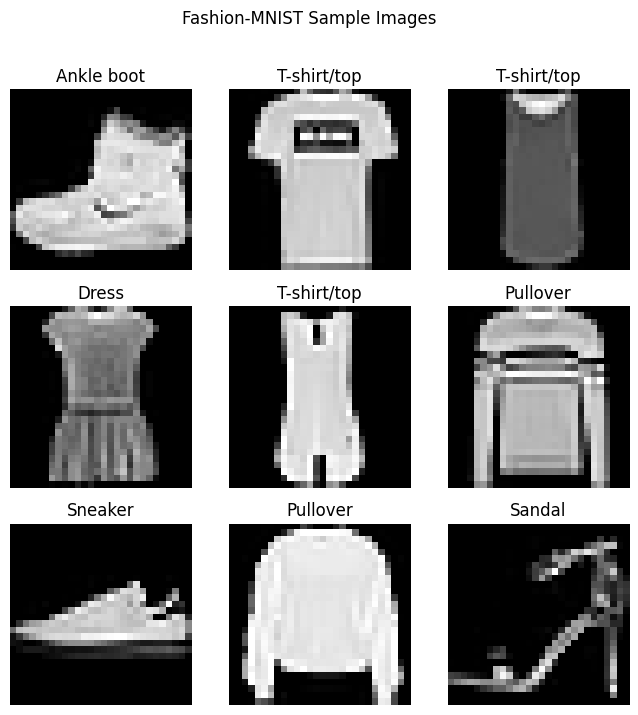

In [16]:
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train_full[i], cmap="gray")
    plt.title(class_names[y_train_full[i]])
    plt.axis("off")
plt.suptitle("Fashion-MNIST Sample Images")
plt.show()


In [17]:
# Train-validation split (80/20)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full)

# Normalize [0,1]
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

# Flatten for ML models
X_train_flat = X_train.reshape(len(X_train), -1)
X_val_flat = X_val.reshape(len(X_val), -1)
X_test_flat = X_test.reshape(len(X_test), -1)

# Standardize for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_flat)
X_val_scaled = scaler.transform(X_val_flat)
X_test_scaled = scaler.transform(X_test_flat)


In [18]:
# ============================
# CODE CELL #5 — ML Baseline Models (Updated & Stable)
# ============================

# Logistic Regression Model
log_reg = LogisticRegression(
    penalty="l2",
    solver="lbfgs",     # stable solver
    max_iter=2000,      # enough iterations for Fashion-MNIST
    n_jobs=-1           # use all CPU cores
)

log_reg.fit(X_train_scaled, y_train)
y_val_pred_lr = log_reg.predict(X_val_scaled)
lr_acc = accuracy_score(y_val, y_val_pred_lr)
print("Logistic Regression Validation Accuracy:", round(lr_acc, 4))


# Decision Tree Model
tree_clf = DecisionTreeClassifier(
    max_depth=25,       # tuned for better accuracy
    random_state=42
)

tree_clf.fit(X_train_flat, y_train)
y_val_pred_tree = tree_clf.predict(X_val_flat)
tree_acc = accuracy_score(y_val, y_val_pred_tree)
print("Decision Tree Validation Accuracy:", round(tree_acc, 4))


Logistic Regression Validation Accuracy: 0.8504
Decision Tree Validation Accuracy: 0.8013


In [19]:
# Decision Tree Model
tree_clf = DecisionTreeClassifier(max_depth=20, random_state=42)
tree_clf.fit(X_train_flat, y_train)
y_val_pred_tree = tree_clf.predict(X_val_flat)
tree_acc = accuracy_score(y_val, y_val_pred_tree)

print("Decision Tree Validation Accuracy:", tree_acc)


Decision Tree Validation Accuracy: 0.80325


In [20]:
if lr_acc >= tree_acc:
    model = log_reg
    X_test_model = X_test_scaled
    best_name = "Logistic Regression"
else:
    model = tree_clf
    X_test_model = X_test_flat
    best_name = "Decision Tree"

y_test_pred = model.predict(X_test_model)
test_acc = accuracy_score(y_test, y_test_pred)

print("BEST MODEL:", best_name)
print("Test Accuracy:", test_acc)
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=class_names))


BEST MODEL: Logistic Regression
Test Accuracy: 0.832

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.79      0.80      0.80      1000
     Trouser       0.95      0.95      0.95      1000
    Pullover       0.72      0.72      0.72      1000
       Dress       0.82      0.85      0.83      1000
        Coat       0.73      0.74      0.74      1000
      Sandal       0.93      0.91      0.92      1000
       Shirt       0.61      0.56      0.58      1000
     Sneaker       0.90      0.93      0.92      1000
         Bag       0.92      0.91      0.92      1000
  Ankle boot       0.93      0.93      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000



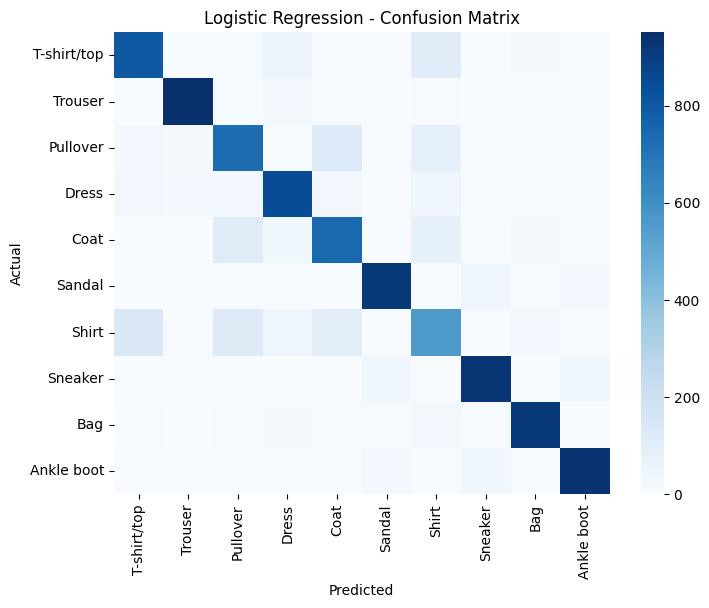

In [21]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title(f"{best_name} - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
